In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,f1_score,roc_curve,auc
import math
from sklearn.feature_selection import SelectFromModel
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
print("\033[1m"+"Starting Model BUilding and Training"+"\033[0m")
df=pd.read_csv("processed_data.csv")

Starting Model BUilding and Training


In [38]:
df['model_group'] = df['Account_Nature'].astype(str) + '-' + df['Type'].astype(str) + '-' + df['Sector'].astype(str)


In [39]:
model_group = df['model_group']

In [40]:
df_d = df.drop(['Age', 'Income', 'Credit_Score', 'Number_of_Products', 'Tenure_of_Association', 
                'Min_Avg_Balance', 'Last_FY_Credit', 'Last_Account_Opened', 'Balance', 
                'Security_Amount', 'Loan_Repayment_Amount', 'Rate_of_Interest', 
                'Loan_Disbursed_Amount', 'NEG_MAB_CORR', 'MAB_CORR', 'SMA_DAYS', 
                'NPA_TO_STD', 'STD_TO_NPA', 'BOUNCE_RATE', 'AVG_WDL', 'prd', 'Type', 
                'Sector', 'Sub_sector', 'Product', 'model_group'], axis=1)

In [41]:
df_dummies = pd.get_dummies(df_d)

# Reattach 'model_group'
df_dummies['model_group'] = model_group

In [42]:
print("\033[1m"+"Model Building Started"+"\033[0m")
print("\033[1m"+"\n Models built\n"+"\033[0m")
print("\033[1m"+"\n Total 14 model for each algotirthm based on type,sector and account position\n"+"\033[0m")

lr_aggregate_combined = []
rf_aggregate_combined = []
knn_aggregate_combined = []

lr_aggregate_pred, rf_aggregate_pred, knn_aggregate_pred = [], [], []
lr_aggregate_y_true, rf_aggregate_y_true, knn_aggregate_y_true = [], [], []
 



Model Building Started

 Models built


 Total 14 model for each algotirthm based on type,sector and account position



In [43]:
for group, group_df in df_dummies.groupby('model_group'):
    # Splitting features and target variable for each group
    
    X = group_df.drop(['Delinquent_No', 'Delinquent_Yes', 'model_group'], axis=1)
    y = group_df['Delinquent_Yes']
    
    
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression
    lr_model = f"lr_model_{group}"
    print(lr_model+"\n")
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_proba = lr_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    lr_combined = pd.concat([X_test.reset_index(drop=True),
                             pd.Series(lr_pred, name='LR_Prediction'),
                             pd.Series(lr_proba, name='LR_Probability')], axis=1)
    lr_aggregate_combined.extend(lr_combined.values.tolist())
    lr_aggregate_pred.extend(lr_pred)
    
    lr_aggregate_y_true.extend(y_test)

lr_model_Standard-CC-AGRI

lr_model_Standard-CC-CORPORATE

lr_model_Standard-CC-MSME

lr_model_Standard-TL-AGRI

lr_model_Standard-TL-CORPORATE

lr_model_Standard-TL-MSME

lr_model_Standard-TL-RETAIL

lr_model_Stressed-CC-AGRI

lr_model_Stressed-CC-CORPORATE

lr_model_Stressed-CC-MSME

lr_model_Stressed-TL-AGRI

lr_model_Stressed-TL-CORPORATE

lr_model_Stressed-TL-MSME

lr_model_Stressed-TL-RETAIL



In [44]:
for group, group_df in df_dummies.groupby('model_group'):
    # Splitting features and target variable for each group
    
    X = group_df.drop(['Delinquent_No', 'Delinquent_Yes', 'model_group'], axis=1)
    y = group_df['Delinquent_Yes']
    
    
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  
    # Random Forest
    rf_model = f"rf_model_{group}"
    print(rf_model+"\n")
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_proba = rf_model.predict_proba(X_test)[:, 1]
    rf_combined = pd.concat([X_test.reset_index(drop=True),
                             pd.Series(rf_pred, name='RF_Prediction'),
                             pd.Series(rf_proba, name='RF_Probability')], axis=1)
    rf_aggregate_combined.extend(rf_combined.values.tolist())
    rf_aggregate_pred.extend(rf_pred)
    
    rf_aggregate_y_true.extend(y_test)
    

rf_model_Standard-CC-AGRI

rf_model_Standard-CC-CORPORATE

rf_model_Standard-CC-MSME

rf_model_Standard-TL-AGRI

rf_model_Standard-TL-CORPORATE

rf_model_Standard-TL-MSME

rf_model_Standard-TL-RETAIL

rf_model_Stressed-CC-AGRI

rf_model_Stressed-CC-CORPORATE

rf_model_Stressed-CC-MSME

rf_model_Stressed-TL-AGRI

rf_model_Stressed-TL-CORPORATE

rf_model_Stressed-TL-MSME

rf_model_Stressed-TL-RETAIL



In [45]:
for group, group_df in df_dummies.groupby('model_group'):
    # Splitting features and target variable for each group
    
    X = group_df.drop(['Delinquent_No', 'Delinquent_Yes', 'model_group'], axis=1)
    y = group_df['Delinquent_Yes']
    
    
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

       
    knn_model = f"knn_model_{group}"
    print(knn_model+"\n")
    sel=SelectFromModel(RandomForestClassifier(n_estimators=100))
    sel.fit(X_train, y_train)
    sel_features=X_train.columns[(sel.get_support())]
    X_train_rf=X_train[sel_features]
    X_test_rf=X_test[sel_features]
    
    
    # KNN
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_rf, y_train)
    knn_pred = knn_model.predict(X_test_rf)
    knn_proba = knn_model.predict_proba(X_test_rf)[:, 1]
    knn_combined = pd.concat([X_test_rf.reset_index(drop=True),
                              pd.Series(knn_pred, name='KNN_Prediction'),
                              pd.Series(knn_proba, name='KNN_Probability')], axis=1)
    knn_aggregate_combined.extend(knn_combined.values.tolist())
    knn_aggregate_pred.extend(knn_pred)
    

    # Store true values (same for all models)
    knn_aggregate_y_true.extend(y_test)

knn_model_Standard-CC-AGRI

knn_model_Standard-CC-CORPORATE

knn_model_Standard-CC-MSME

knn_model_Standard-TL-AGRI

knn_model_Standard-TL-CORPORATE

knn_model_Standard-TL-MSME

knn_model_Standard-TL-RETAIL

knn_model_Stressed-CC-AGRI

knn_model_Stressed-CC-CORPORATE

knn_model_Stressed-CC-MSME

knn_model_Stressed-TL-AGRI

knn_model_Stressed-TL-CORPORATE

knn_model_Stressed-TL-MSME

knn_model_Stressed-TL-RETAIL




Evaluate cumulative performance for each model

Cumulative Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     14161
           1       0.80      0.75      0.78      5845

    accuracy                           0.87     20006
   macro avg       0.85      0.84      0.84     20006
weighted avg       0.87      0.87      0.87     20006

0.7757586450247
ROC-AUC: 0.8375062317988132
Root Mean Square Error: 0.35645740479834237


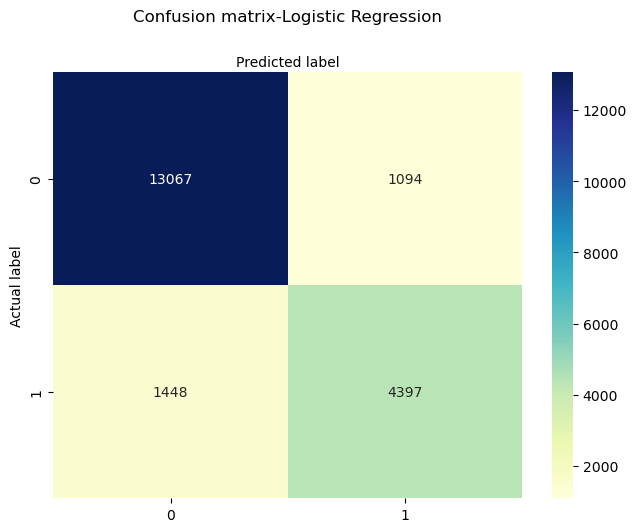

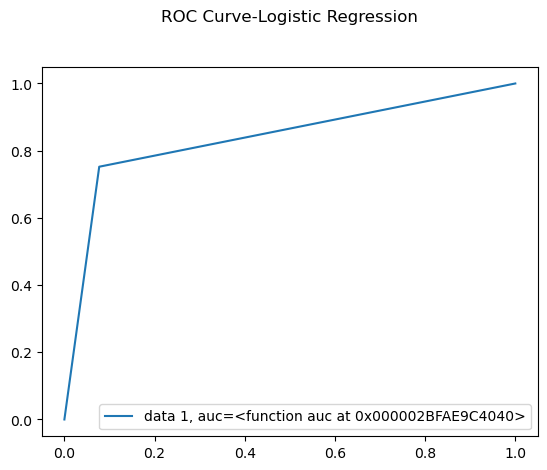

In [46]:
print("\033[1m"+"\nEvaluate cumulative performance for each model\n"+"\033[0m")
print("\033[1m"+"Cumulative Metrics for Logistic Regression:"+"\033[0m")
print(classification_report(lr_aggregate_y_true, lr_aggregate_pred))
print(f1_score(lr_aggregate_y_true, lr_aggregate_pred))
print("ROC-AUC:", roc_auc_score(lr_aggregate_y_true, lr_aggregate_pred))
lr_aggregate_y_true_numeric = np.array(lr_aggregate_y_true).astype(float)
lr_aggregate_pred_numeric = np.array(lr_aggregate_pred).astype(float)

# Calculate RMSE
RMSE = math.sqrt(np.square(np.subtract(lr_aggregate_y_true_numeric, lr_aggregate_pred_numeric)).mean())
print("Root Mean Square Error:", RMSE)

conf_matrix=confusion_matrix(lr_aggregate_y_true, lr_aggregate_pred)
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) # create heatmap 
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout()
plt.title('Confusion matrix-Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 
plt.Text(0.5,257.44,'Predicted label');
plt.show()

fpr, tpr, _ = roc_curve(lr_aggregate_y_true,  lr_aggregate_pred) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.title('ROC Curve-Logistic Regression', y=1.1)
plt.show()


Cumulative Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     14161
           1       0.97      0.67      0.79      5845

    accuracy                           0.90     20006
   macro avg       0.92      0.83      0.86     20006
weighted avg       0.91      0.90      0.89     20006

ROC-AUC: 0.8320617433306539
Root Mean Square Error: 0.3197957460696417


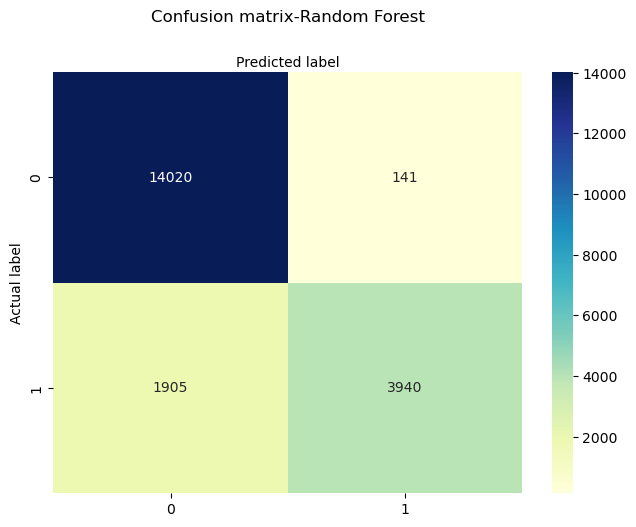

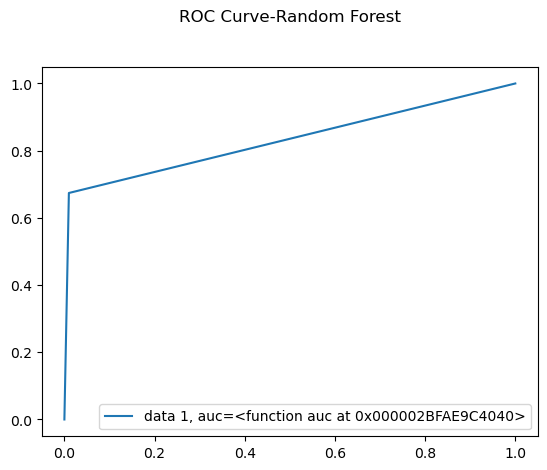

In [47]:
print("\033[1m"+"\nCumulative Metrics for Random Forest:"+"\033[0m")
print(classification_report(rf_aggregate_y_true, rf_aggregate_pred))
print("ROC-AUC:", roc_auc_score(rf_aggregate_y_true, rf_aggregate_pred))
rf_aggregate_y_true_numeric = np.array(rf_aggregate_y_true).astype(float)
rf_aggregate_pred_numeric = np.array(rf_aggregate_pred).astype(float)

# Calculate RMSE
RMSE = math.sqrt(np.square(np.subtract(rf_aggregate_y_true_numeric, rf_aggregate_pred_numeric)).mean())
print("Root Mean Square Error:", RMSE)

conf_matrix=confusion_matrix(rf_aggregate_y_true, rf_aggregate_pred)
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) # create heatmap 
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout()
plt.title('Confusion matrix-Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 
plt.Text(0.5,257.44,'Predicted label');
plt.show()

fpr, tpr, _ = roc_curve(rf_aggregate_y_true,  rf_aggregate_pred) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.title('ROC Curve-Random Forest', y=1.1)
plt.show()


Cumulative Metrics for KNN:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     14161
           1       0.72      0.56      0.63      5845

    accuracy                           0.81     20006
   macro avg       0.78      0.74      0.75     20006
weighted avg       0.80      0.81      0.80     20006

ROC-AUC: 0.7355338331176078
Root Mean Square Error: 0.43799822746881095


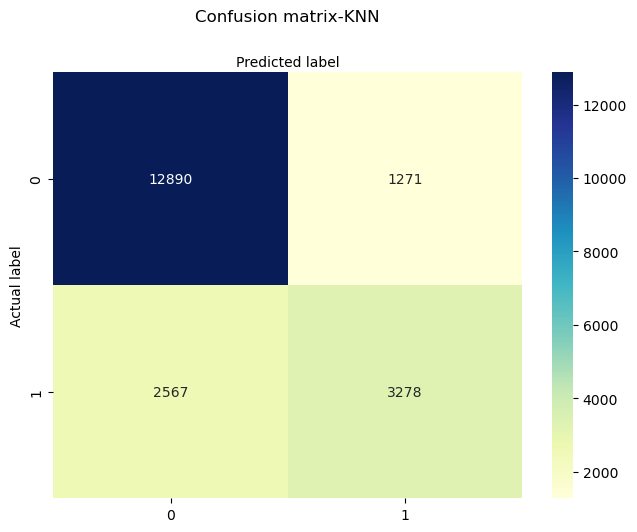

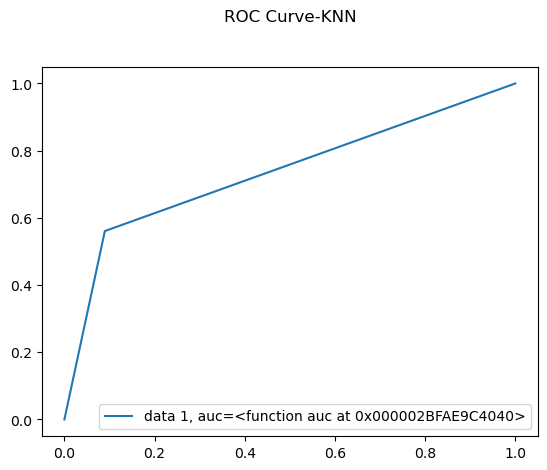

In [48]:

print("\033[1m"+"\nCumulative Metrics for KNN:"+"\033[0m")
print(classification_report(knn_aggregate_y_true, knn_aggregate_pred))
print("ROC-AUC:", roc_auc_score(knn_aggregate_y_true, knn_aggregate_pred))
knn_aggregate_y_true_numeric = np.array(knn_aggregate_y_true).astype(float)
knn_aggregate_pred_numeric = np.array(knn_aggregate_pred).astype(float)

# Calculate RMSE
RMSE = math.sqrt(np.square(np.subtract(knn_aggregate_y_true_numeric, knn_aggregate_pred_numeric)).mean())
print("Root Mean Square Error:", RMSE)


conf_matrix=confusion_matrix(knn_aggregate_y_true, knn_aggregate_pred)
class_names=[0,1] 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) # create heatmap 
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout()
plt.title('Confusion matrix-KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 
plt.Text(0.5,257.44,'Predicted label');
plt.show()

fpr, tpr, _ = roc_curve(knn_aggregate_y_true,  knn_aggregate_pred) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.title('ROC Curve-KNN', y=1.1)
plt.show()

In [49]:
print("\033[1m"+"Model Selection Started"+"\033[0m")
print("\033[1m"+"\nCombining f1,RMSE and auc to get combined score"+"\033[0m")

f1_lr=f1_score(lr_aggregate_y_true, lr_aggregate_pred)
RMSE_lr = 1-math.sqrt(np.square(np.subtract(lr_aggregate_y_true_numeric,lr_aggregate_pred_numeric)).mean())
auc_lr=roc_auc_score(lr_aggregate_y_true, lr_aggregate_pred)
score_lr=3*(f1_lr*RMSE_lr*auc_lr)/(f1_lr+RMSE_lr+auc_lr)


f1_rf=f1_score(rf_aggregate_y_true, rf_aggregate_pred)
RMSE_rf = 1-math.sqrt(np.square(np.subtract(rf_aggregate_y_true_numeric,rf_aggregate_pred_numeric)).mean())
auc_rf=roc_auc_score(rf_aggregate_y_true, rf_aggregate_pred)
score_rf=3*(f1_rf*RMSE_rf*auc_rf)/(f1_rf+RMSE_rf+auc_rf)


f1_knn=f1_score(knn_aggregate_y_true, knn_aggregate_pred)
RMSE_knn = 1-math.sqrt(np.square(np.subtract(knn_aggregate_y_true_numeric,knn_aggregate_pred_numeric)).mean())
auc_knn=roc_auc_score(knn_aggregate_y_true, knn_aggregate_pred)
score_knn=3*(f1_knn*RMSE_knn*auc_knn)/(f1_knn+RMSE_knn+auc_knn)

print("\nLR Final Score",round(score_lr,2),"\nRF Final Score",round(score_rf,2),"\nKNN Final Score",round(score_knn,2))

Model Selection Started

Combining f1,RMSE and auc to get combined score

LR Final Score 0.56 
RF Final Score 0.58 
KNN Final Score 0.41


In [50]:
print("\033[1m"+"Selecting and Saving the  Models With highest Score\n"+"\033[0m")

final_score = max(score_lr, score_rf, score_knn)
model_selected=""
if (score_lr == final_score):
    for group, group_df in df_dummies.groupby('model_group'):
        final_model = f"lr_model_{group}"
        print(final_model)
        #dump(final_model,f"lr_model_{group}.joblib")
        model_selected="Logistic Regression"
elif (score_rf == final_score):
    for group, group_df in df_dummies.groupby('model_group'):
        final_model = f"rf_model_{group}"
        #dump(final_model,f"rf_model_{group}.joblib")
        print(final_model)
        model_selected="Random Forest"
else:
    for group, group_df in df_dummies.groupby('model_group'):
        final_model = f"knn_model_{group}"
        #dump(final_model,f"knn_model_{group}.joblib")
        print(final_model)
        model_selected="KNN"
        
print("\033[1m"+"\n\nModel Selected is : ",model_selected+"\033[0m")



Selecting and Saving the  Models With highest Score

rf_model_Standard-CC-AGRI
rf_model_Standard-CC-CORPORATE
rf_model_Standard-CC-MSME
rf_model_Standard-TL-AGRI
rf_model_Standard-TL-CORPORATE
rf_model_Standard-TL-MSME
rf_model_Standard-TL-RETAIL
rf_model_Stressed-CC-AGRI
rf_model_Stressed-CC-CORPORATE
rf_model_Stressed-CC-MSME
rf_model_Stressed-TL-AGRI
rf_model_Stressed-TL-CORPORATE
rf_model_Stressed-TL-MSME
rf_model_Stressed-TL-RETAIL


Model Selected is :  Random Forest


In [51]:
import json

variable_to_store = {'Model_Selected': model_selected}
with open('env_variables.json', 'w') as file:
    json.dump(variable_to_store, file)